# **1.Data visualization**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/airline/AirQualityUCI.csv


In [2]:
df = pd.read_csv("/kaggle/input/airline/AirQualityUCI.csv", sep =";", decimal =",")
df = df.iloc[:, 0:14]

In [3]:
df.shape

(9471, 14)

In [4]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6


In [5]:
df.isna().sum()

Date             114
Time             114
CO(GT)           114
PT08.S1(CO)      114
NMHC(GT)         114
C6H6(GT)         114
PT08.S2(NMHC)    114
NOx(GT)          114
PT08.S3(NOx)     114
NO2(GT)          114
PT08.S4(NO2)     114
PT08.S5(O3)      114
T                114
RH               114
dtype: int64

In [6]:
df = df[df['Date'].notnull()]

In [7]:
df.isna().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
dtype: int64

In [8]:
df['DateTime'] = (df.Date) + " " + (df.Time)
print(type(df.DateTime[0]))

<class 'str'>


In [9]:
print(df.DateTime[0])

10/03/2004 18.00.00


In [10]:
import datetime

In [11]:
df.DateTime = df.DateTime.apply(lambda x: datetime.datetime.strptime(x, '%d/%m/%Y %H.%M.%S'))
print (type(df.DateTime[0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [12]:
df.index = df.DateTime

In [13]:
import matplotlib.pyplot as plt

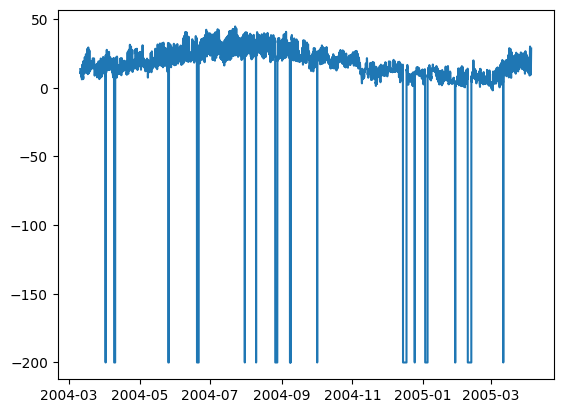

In [14]:
plt.plot(df['T'])

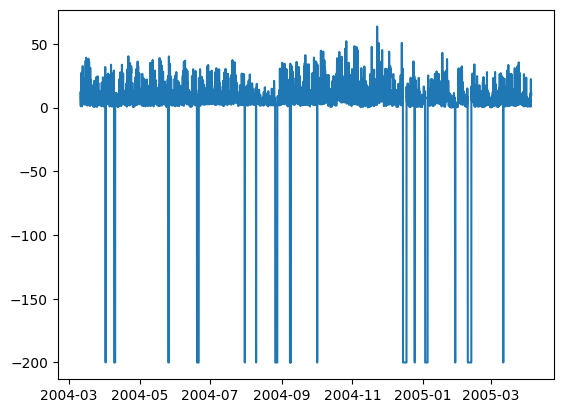

In [15]:
plt.plot(df['C6H6(GT)'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f65e4526200>,
 'caps': [<matplotlib.lines.Line2D at 0x7f65e4526740>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f65e4525f60>],
 'medians': [<matplotlib.lines.Line2D at 0x7f65e4526c80>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f65e4526f20>],
 'means': []}

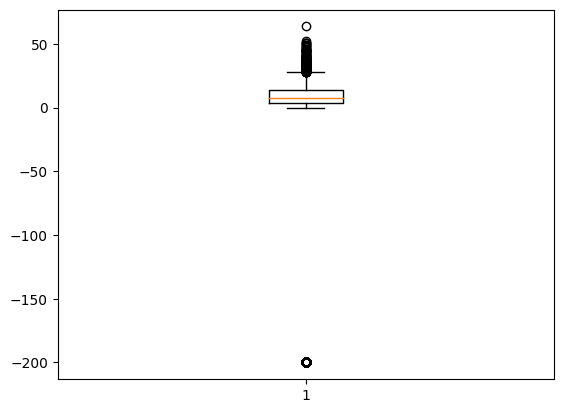

In [16]:
plt.boxplot(df['C6H6(GT)'].values)

# **2.Naive Methods**

In [17]:
print('Mean: ', np.mean(df['T']))
print('Standard Deviation: ', np.std(df['T']))
print('Maximum Temperature: ', np.max(df['T']))
print('Minimum Temperature: ', np.min(df['T']))

Mean:  9.778305012290264
Standard Deviation:  43.201314375146595
Maximum Temperature:  44.6
Minimum Temperature:  -200.0


>#  1st naive method

In [18]:
df['T']
df['T_t-1'] = df['T'].shift(1)

In [19]:
df['T'].shape

(9357,)

In [20]:
df['T_t-1'].shape

(9357,)

In [21]:
df_naive = df[['T','T_t-1']][1:]

In [22]:
from sklearn import metrics
from math import sqrt

true = df_naive['T']
prediction = df_naive['T_t-1']

error = sqrt(metrics.mean_squared_error(true,prediction))
print('RMSE for Naive Method 1: ', error)

RMSE for Naive Method 1:  12.901140576492974


>#  2nd naive method

In [23]:
df['T_rm'] = df['T'].rolling(3).mean().shift(1)
df_naive = df[['T','T_rm']].dropna()

In [24]:
true = df_naive['T']
prediction = df_naive['T_rm']
error = sqrt(metrics.mean_squared_error(true, prediction))
print('RMSE for Naive Method 2: ', error)

RMSE for Naive Method 2:  14.957633272839242


# **3.Auto Regression**

In [25]:
split = len(df) - int(0.2*len(df))
train, test = df['T'][:split], df['T'][split:]

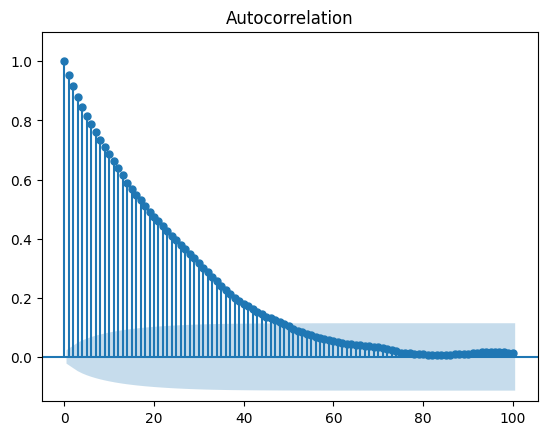

In [26]:
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(train, lags=100)
plt.ylim(-0.15, 1.1)
plt.show()

# **4.Moving Average**

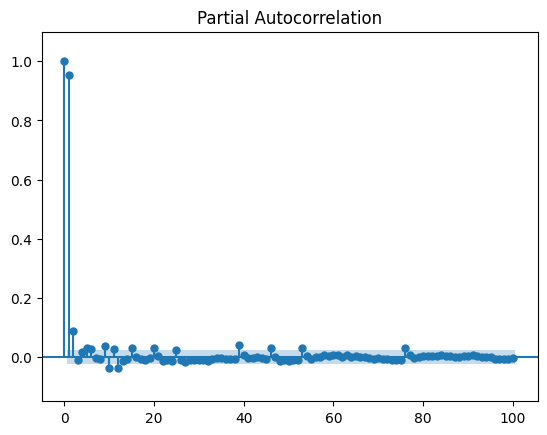

In [27]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(train, lags=100)
plt.ylim(-0.15, 1.1)
plt.show()

# **5.ARIMA**

In [28]:
from statsmodels.tsa.stattools import adfuller

In [29]:
result = adfuller(train)
print('ADF Statistics: %f'%result[0])
print('p-value: %f'%result[1])
print('Critical values: ')
for key, items in result[4].items():
    print('\t%s: %.3f' %(key, items))

ADF Statistics: -10.406056
p-value: 0.000000
Critical values: 
	1%: -3.431
	5%: -2.862
	10%: -2.567


In [30]:
!pip install hurst
import hurst

In [31]:
H, c, data = hurst.compute_Hc(train)
print("H = {:.4f}, c = {:.4f}".format(H, c))

H = 0.1660, c = 5.0740


In [32]:
from statsmodels.tsa.arima.model import ARIMA


In [34]:
model = ARIMA(train.values, order=(5, 0, 2))
model_fit = model.fit()


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [35]:
prediction = model_fit.predict(len(test))
test_ = pd.DataFrame(test)
test_['predictions'] = prediction[0:1871]

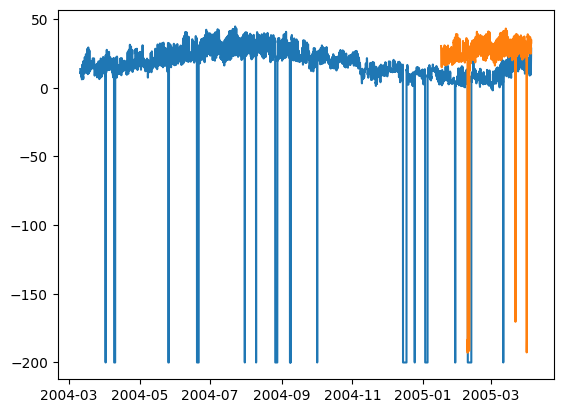

In [36]:
plt.plot(df['T'])
plt.plot(test_['predictions'])
plt.show()

In [37]:
error = sqrt(metrics.mean_squared_error(test.values, prediction[0:1871]))
print('RMSE for ARIMA model is: ', error)

RMSE for ARIMA model is:  43.21341317139683
